In [3]:
# Problemin Tanımı

# Wikipedia örnek datasından metin ön işleme, temizleme işlemleri gerçekleştirip, görselleştirme çalışmaları yapmak.


# Veri Seti Hikayesi

# Wikipedia datasından alınmış metinleri içermektedir.

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

Metin ön işleme işlemleri.

In [3]:
df = pd.read_csv("wiki_data.csv")
df = df[:2000]
df.head()

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


In [4]:
# eksik veri kontrolü

print(df.isnull().sum())
print(df.info())

Unnamed: 0    0
text          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   text        2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None


In [5]:
# •	Büyük küçük harf dönüşümü
# •	Noktalama işaretlerin çıkarılması
# •	Numerik ifadelerin çıkarılması

def clean_text(text):
    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.str.replace(r'[^\w\s]', '')
    text = text.str.replace("\n" , '')
    # Numbers
    text = text.str.replace('\d', '')
    return text

df["text"] = clean_text(df["text"])

df.head()

,Unnamed: 0,text
0,1,anovoanovo (formerly a novo) is a computer ser...
1,2,battery indicatora battery indicator (also kno...
2,3,"bob peaserobert allen pease (august 22, 1940â ..."
3,4,cavnetcavnet was a secure military forum which...
4,5,clidarthe clidar is a scientific instrument us...


In [6]:
# Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimelerin çıkarılması

def remove_stopwords(text):
    stop_words = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

df["text"] = remove_stopwords(df["text"])

In [7]:
# Metinde az tekrarlayan kelimeleri bulunuz.

pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

1863;              1
prentice           1
guncotton.small    1
wolfsberg          1
lenk               1
                  ..
m.52               1
sub-sonic          1
attlee's           1
1949.the           1
fluids/solids      1
Name: count, Length: 1000, dtype: int64

In [8]:
# Metinde az tekrarlayan kelimeleri metin içerisinden çıkartınız.

sil = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [9]:
# Metinleri tokenize edip sonuçları gözlemleyiniz.

df["text"].apply(lambda x: TextBlob(x).words)

0       [anovoanovo, formerly, novo, computer, service...
1       [battery, indicatora, battery, indicator, also...
2       [bob, peaserobert, allen, pease, august, 22, 1...
3       [cavnetcavnet, secure, military, forum, became...
4       [clidarthe, clidar, scientific, instrument, us...
                              ...                        
1995    [edinburgh, calotype, clubthe, edinburgh, calo...
1996    [endrinendrin, organochloride, chemical, formu...
1997    [ethylene, glycol, dinitrateethylene, glycol, ...
1998    [forges, de, syamthe, forges, de, syam, syam, ...
1999    [frank-kamenetskii, theoryin, combustion, fran...
Name: text, Length: 2000, dtype: object

In [10]:
# Lemmatization işlemini yapınız. (normalleştirme)

df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.head()

,Unnamed: 0,text
0,1,anovoanovo (formerly novo) computer service co...
1,2,battery indicatora battery indicator (also kno...
2,3,"bob peaserobert allen pea (august 22, 1940â â€..."
3,4,cavnetcavnet secure military forum became oper...
4,5,clidarthe clidar scientific instrument used me...


In [11]:
# Metindeki terimlerin frekanslarını hesaplayınız. (Barplot grafiği için gerekli)

tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.head()


,index,0
0,company,1862.00
1,anovoanovo,1.00
2,1.6,3.00
3,four,473.00
4,year,907.00


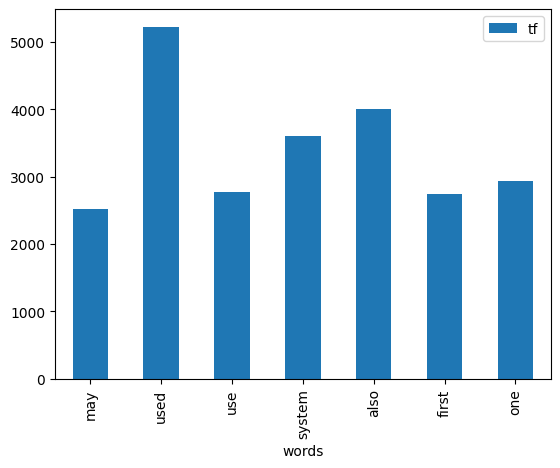

In [12]:
# Barplot grafiğini oluşturunuz.

# Sütunların isimlendirilmesi
tf.columns = ["words", "tf"]
# 2000'den fazla geçen kelimelerin görselleştirilmesi
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

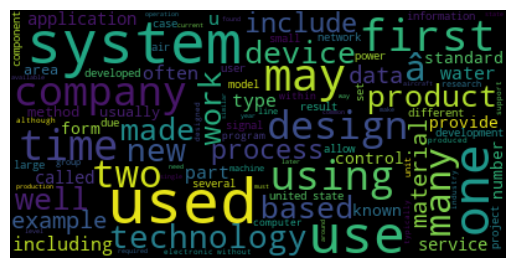

In [14]:
# Kelimeleri WordCloud ile görselleştiriniz.

# kelimeleri birleştirdik
text = " ".join(i for i in df["text"])

# wordcloud görselleştirmenin özelliklerini belirliyoruz
wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()